In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from plotly import graph_objects as go
import plotly.express as px
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler

src_url = 'https://baseballsavant.mlb.com/leaderboard/custom?year=2021,2020,2019,2018,2017,2016,2015&type=batter&filter=&sort=15&sortDir=desc&min=q&selections=player_age,b_total_pa,b_k_percent,b_bb_percent,xba,xslg,woba,xwoba,xobp,xiso,wobacon,xwobacon,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,pull_percent,straightaway_percent,opposite_percent,batted_ball,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,hp_to_1b,&chart=false&x=xba&y=xba&r=no&chartType=beeswarm'

#### pybaseball docs  
https://github.com/jldbc/pybaseball/tree/master/docs

pitching_stats(start_season, end_season=None, league='all', qual=1, ind=1)  
statcast_pitcher(start_dt=[yesterday's date], end_dt=None, player_id)

In [4]:
from pybaseball import pitching_stats, batting_stats, statcast_batter, statcast_pitcher, playerid_lookup

In [87]:
data = pitching_stats(2021, qual=1)

In [6]:
playerid_lookup('pressly', 'ryan')#['key_mlbam'][1]

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,pressly,ryan,519151,presr001,pressry01,7005,2013.0,2021.0


Gathering Player Data


<AxesSubplot:xlabel='game_date'>

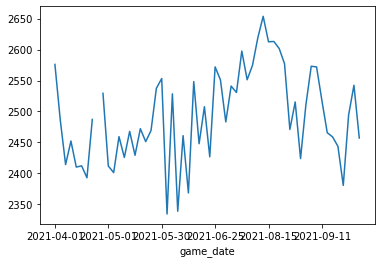

In [136]:
#playerid_lookup('burnes', 'corbin')['key_mlbam'][0]
sc = statcast_pitcher('2021-03-20', '2021-10-01', playerid_lookup('hader', 'josh')['key_mlbam'][0])
sc[sc['pitch_type']=='SL'].groupby('game_date')['release_spin_rate'].mean().plot()

In [93]:
sc.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2964,CH,2021-04-01,87.8,-1.90,5.60,"Cole, Gerrit",624415,543037,NaN,foul,NaN,NaN,NaN,NaN,7,Cavan Biggio strikes out swinging.,R,L,R,NYY,TOR,S,NaN,NaN,1,1,2021,-1.43,1.15,-0.52,2.11,NaN,NaN,NaN,1,1,Top,NaN,NaN,NaN,NaN,596142,NaN,NaN,6.327221,-127.524263,-4.645841,-16.872077,29.883396,-18.879655,3.47,1.59,NaN,NaN,NaN,87.8,1855.0,6.7,634642,543037,596142,457803,518934,570482,650402,640449,543305,592450,53.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,Changeup,0,0,0,0,0,0,0,0,Infield shift,Standard,242.0,0.000,-0.043
2965,KC,2021-04-01,82.2,-1.89,5.82,"Cole, Gerrit",624415,543037,NaN,ball,NaN,NaN,NaN,NaN,13,Cavan Biggio strikes out swinging.,R,L,R,NYY,TOR,B,NaN,NaN,0,1,2021,0.70,-1.33,-0.03,0.62,NaN,NaN,NaN,1,1,Top,NaN,NaN,NaN,NaN,596142,NaN,NaN,2.855331,-119.497863,-2.504379,5.958637,27.970793,-44.429937,3.32,1.59,NaN,NaN,NaN,81.4,2737.0,6.3,634642,543037,596142,457803,518934,570482,650402,640449,543305,592450,54.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,Knuckle Curve,0,0,0,0,0,0,0,0,Infield shift,Standard,29.0,0.000,0.021
2966,FF,2021-04-01,96.6,-1.83,5.81,"Cole, Gerrit",624415,543037,NaN,called_strike,NaN,NaN,NaN,NaN,4,Cavan Biggio strikes out swinging.,R,L,R,NYY,TOR,S,NaN,NaN,0,0,2021,-0.83,1.78,-0.38,2.45,NaN,NaN,NaN,1,1,Top,NaN,NaN,NaN,NaN,596142,NaN,NaN,5.769469,-140.221881,-7.334749,-12.291784,38.095572,-7.272530,3.36,1.59,NaN,NaN,NaN,96.0,2573.0,6.6,634642,543037,596142,457803,518934,570482,650402,640449,543305,592450,53.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Infield shift,Standard,209.0,0.000,-0.027
2967,FF,2021-04-01,95.3,-1.78,5.79,"Cole, Gerrit",543760,543037,field_out,hit_into_play,NaN,NaN,NaN,NaN,6,"Marcus Semien grounds out, shortstop Gleyber T...",R,R,R,NYY,TOR,X,6.0,ground_ball,1,0,2021,-0.88,1.58,0.64,2.77,NaN,NaN,NaN,0,1,Top,99.28,147.19,NaN,NaN,596142,NaN,NaN,8.366321,-138.503993,-5.896888,-13.173674,28.995238,-10.651418,3.37,1.53,39.0,99.9,-1.0,95.8,2581.0,6.5,634642,543037,596142,457803,518934,570482,650402,640449,543305,592450,53.97,0.377,0.34,0.0,1.0,0.0,0.0,2.0,1,2,4-Seam Fastball,0,0,0,0,0,0,0,0,Infield shift,Standard,209.0,0.022,-0.279
2968,FF,2021-04-01,97.7,-2.05,5.82,"Cole, Gerrit",543760,543037,NaN,ball,NaN,NaN,NaN,NaN,11,"Marcus Semien grounds out, shortstop Gleyber T...",R,R,R,NYY,TOR,B,NaN,NaN,0,0,2021,-0.91,1.60,-0.50,3.54,NaN,NaN,NaN,0,1,Top,NaN,NaN,NaN,NaN,596142,NaN,NaN,6.327257,-142.053812,-4.346513,-13.834897,33.130446,-9.702751,3.25,1.53,NaN,NaN,NaN,98.1,2673.0,6.6,634642,543037,596142,457803,518934,570482,650402,640449,543305,592450,53.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Infield shift,Standard,208.0,0.000,0.038


In [137]:
sc = statcast_batter('2021-03-20', '2021-10-01', playerid_lookup('correa', 'carlos')['key_mlbam'][0])

Gathering Player Data


In [139]:
sc.if_fielding_alignment.value_counts()

Standard         2261
Infield shift     179
Strategic         155
Name: if_fielding_alignment, dtype: int64

In [20]:
b = batting_stats(2021, qual=1)

In [21]:
b[['Name', 'WAR']]['WAR'].sum()

572.6999999999999

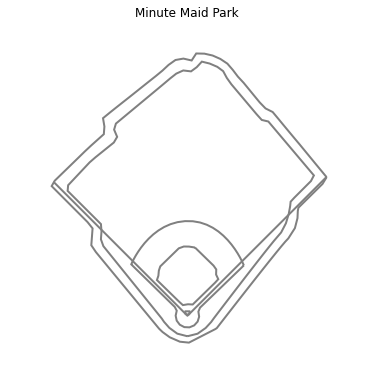

In [25]:
from pybaseball import plot_stadium
plot_stadium('astros')

In [13]:
for i in b:
    print(i)

IDfg
Season
Name
Team
Age
G
AB
PA
H
1B
2B
3B
HR
R
RBI
BB
IBB
SO
HBP
SF
SH
GDP
SB
CS
AVG
GB
FB
LD
IFFB
Pitches
Balls
Strikes
IFH
BU
BUH
BB%
K%
BB/K
OBP
SLG
OPS
ISO
BABIP
GB/FB
LD%
GB%
FB%
IFFB%
HR/FB
IFH%
BUH%
wOBA
wRAA
wRC
Bat
Fld
Rep
Pos
RAR
WAR
Dol
Spd
wRC+
WPA
-WPA
+WPA
RE24
REW
pLI
phLI
PH
WPA/LI
Clutch
FB% (Pitch)
FBv
SL%
SLv
CT%
CTv
CB%
CBv
CH%
CHv
SF%
SFv
KN%
KNv
XX%
PO%
wFB
wSL
wCT
wCB
wCH
wSF
wKN
wFB/C
wSL/C
wCT/C
wCB/C
wCH/C
wSF/C
wKN/C
O-Swing%
Z-Swing%
Swing%
O-Contact%
Z-Contact%
Contact%
Zone%
F-Strike%
SwStr%
BsR
FA% (sc)
FT% (sc)
FC% (sc)
FS% (sc)
FO% (sc)
SI% (sc)
SL% (sc)
CU% (sc)
KC% (sc)
EP% (sc)
CH% (sc)
SC% (sc)
KN% (sc)
UN% (sc)
vFA (sc)
vFT (sc)
vFC (sc)
vFS (sc)
vFO (sc)
vSI (sc)
vSL (sc)
vCU (sc)
vKC (sc)
vEP (sc)
vCH (sc)
vSC (sc)
vKN (sc)
FA-X (sc)
FT-X (sc)
FC-X (sc)
FS-X (sc)
FO-X (sc)
SI-X (sc)
SL-X (sc)
CU-X (sc)
KC-X (sc)
EP-X (sc)
CH-X (sc)
SC-X (sc)
KN-X (sc)
FA-Z (sc)
FT-Z (sc)
FC-Z (sc)
FS-Z (sc)
FO-Z (sc)
SI-Z (sc)
SL-Z (sc)
CU-Z (sc)
KC-Z (sc)
EP-

Gathering Player Data


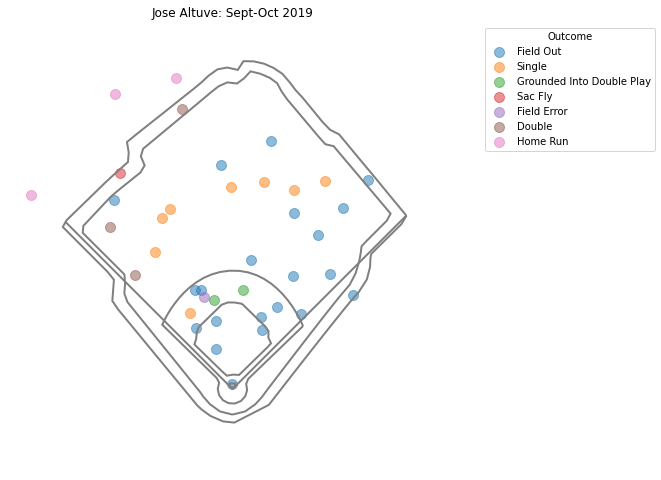

In [27]:
from pybaseball import statcast_batter, spraychart

data = statcast_batter('2019-10-01', '2019-10-31', 514888)
sub_data = data[data['home_team'] == 'HOU']
spraychart(sub_data, 'astros', title='Jose Altuve: Sept-Oct 2019')

In [14]:
from pybaseball import bwar_bat
bwar = bwar_bat()

In [64]:
bwar[(bwar['pitcher']=='N') & (bwar['year_ID']==2021)]

,name_common,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,pitcher,G,PA,salary,runs_above_avg,runs_above_avg_off,runs_above_avg_def,WAR_rep,WAA,WAR
255,José Abreu,547989.0,abreujo02,2021,CHW,1,AL,N,152,659.0,17666666.0,7.4,8.4,-10.1,2.13,0.86,2.99
359,Ronald Acuna Jr.,660670.0,acunaro01,2021,ATL,1,NL,N,82,360.0,5000000.0,24.8,22.8,-0.8,1.17,2.41,3.58
384,Willy Adames,642715.0,adamewi01,2021,MIL,2,NL,N,99,413.0,NaN,21.7,23.7,2.9,1.41,2.09,3.50
385,Willy Adames,642715.0,adamewi01,2021,TBR,1,AL,N,41,142.0,NaN,1.7,-1.3,5.0,0.48,0.19,0.67
515,Matt Adams,571431.0,adamsma01,2021,COL,1,NL,N,22,40.0,NaN,-3.6,-4.6,0.7,0.13,-0.38,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117935,Andrew Young,670370.0,youngan02,2021,ARI,1,NL,N,58,104.0,NaN,-10.4,0.6,-10.6,0.35,-1.09,-0.74
118483,Seby Zavala,664874.0,zavalse01,2021,CHW,1,AL,N,37,104.0,NaN,-5.9,-2.9,-1.1,0.34,-0.58,-0.24
118592,Bradley Zimmer,605548.0,zimmebr01,2021,CLE,1,AL,N,99,348.0,NaN,-0.5,-3.5,2.3,1.16,0.01,1.17
118689,Ryan Zimmerman,475582.0,zimmery01,2021,WSN,1,NL,N,110,273.0,1000000.0,3.3,-1.7,2.2,0.93,0.27,1.20


In [30]:
playerid_lookup('cole', 'gerrit')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,cole,gerrit,543037,coleg001,colege01,13125,2013.0,2021.0


In [5]:
from pybaseball import top_prospects

# Get top pitching prospects for the Toronto Blue Jays
topProspects = top_prospects("astros")

ValueError: No tables found

### Batted Ball Profile  
GB% + FB% + LD% + PU%  
Pull % + Straight% + Oppo%  
Weak% + Topped% + Under% + Flare% + Solid% + Barrel%

Barrels are best, 95+ EV, ideal LA  
Solid makes up a space right next to barrels, slightly less ideal  
Flares are next best. These are more likely to be singles  
Topped are usually infield ground balls, generally 5 degrees or lower  
Under are typically weaker fly balls, often over 40 degrees  
Weak is particularly low EV

In [65]:
def load_data():
    df = pd.read_csv('hitting.csv')
    df.rename(columns={'b_total_pa':'pa', 'player_age':'age', 'player_id':'id', 'last_name':'last', ' first_name':'first', 
                       'b_k_percent':'k%', 'b_bb_percent':'bb%', 'exit_velocity_avg':'ev', 'launch_angle_avg':'la', 
                       'barrel_batted_rate':'barrel%', 'solidcontact_percent':'solid%', 'flareburner_percent':'flare%', 
                       'poorlyunder_percent':'under%', 'poorlytopped_percent':'topped%', 'poorlyweak_percent':'weak%', 
                       'hard_hit_percent':'hard%', 'groundballs_percent':'gb%', 'flyballs_percent':'fb%', 
                       'linedrives_percent':'ld%', 'pull_percent':'pull%', 'straightaway_percent':'straight%', 
                       'opposite_percent':'oppo%', 'batted_ball':'bbe', 'popups_percent':'pu%'
                      }, inplace=True)
    df['first'] = df['first'].str.strip()
    df['last'] = df['last'].str.strip()
    df = df[['id', 'first', 'last', 'year', 'age', 'pa', 'ev', 'la', 'k%', 'bb%', 'xba', 'xslg',
       'woba', 'xwoba', 'wobacon', 'xwobacon', 'xobp', 'xiso', 'gb%', 'fb%', 'ld%',
       'weak%', 'topped%', 'under%', 'flare%', 'solid%', 'hard%', 'barrel%']]
    return df

In [66]:
def scale_data(df, cols):
    """
    INPUT: 
        df: original dataframe
        list: subset of columns to scale
    OUTPUT:
        df: scaled data
    """
    scaler = MinMaxScaler()
    scaler.fit(df[cols])
    scaled_df = scaler.transform(df[cols])
    scaled_df = pd.DataFrame(scaled_df)
    scaled_df.columns=[df[cols].columns.tolist()]
    return scaled_df

In [68]:
# loads and cleans initial data
df = load_data()
# creates df from select columns and scales them
scaled_df = scale_data(df, cols)

In [69]:
# initialize a list of columns and a player to compare to
cols = ['weak%', 'topped%', 'under%', 'flare%', 'solid%', 'hard%']
player_id = df[(df['first']=='Jose') & (df['last']=='Altuve') & (df['year']==2017)].index[0]

In [70]:
df.loc[:,['id', 'first', 'last', 'year', 'age', 'woba', 'wobacon', 'xwobacon']+cols]

,id,first,last,year,age,woba,wobacon,xwobacon,weak%,topped%,under%,flare%,solid%,hard%
0,116338,Torii,Hunter,2015,40,0.304,0.343,0.325,2.9,39.0,24.5,21.6,5.2,35.3
1,120074,David,Ortiz,2015,40,0.379,0.418,0.470,1.6,27.1,24.0,24.9,8.4,49.5
2,120074,David,Ortiz,2016,41,0.420,0.458,0.457,0.9,24.5,27.3,20.7,8.1,48.2
3,121347,Alex,Rodriguez,2015,40,0.361,0.425,0.432,1.0,35.1,23.9,20.3,8.1,44.2
4,133380,Aramis,Ramirez,2015,37,0.309,0.329,0.318,3.4,29.4,30.3,23.3,6.6,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,669720,Austin,Hays,2021,26,0.328,0.384,0.366,4.7,33.0,27.0,21.0,5.2,39.2
978,670032,Nicky,Lopez,2021,26,0.329,0.340,0.278,7.1,44.7,19.4,24.0,3.9,26.9
979,670032,Nicky,Lopez,2020,25,0.254,0.265,0.315,8.4,42.7,17.6,26.7,3.1,26.7
980,670541,Yordan,Alvarez,2021,24,0.370,0.460,0.484,3.0,29.1,23.8,20.5,7.6,54.2


In [71]:
def add_distance_metrics(player_id, col_list):
    scaled_df = scale_data(df, col_list)
    df2 = df.loc[:,['id', 'first', 'last', 'year', 'age', 'woba', 'wobacon', 'xwobacon']+col_list]
    for j, i in scaled_df.iterrows():
        df2.at[j,'corr'] = pearsonr(scaled_df.loc[player_id,col_list],i[col_list])[0]
        df2.at[j,'eucl_dist'] = np.linalg.norm(scaled_df.loc[player_id,col_list] - i[col_list])
        df2.at[j,'manh_dist']= sum(abs(e - s) for s, e in zip(scaled_df.loc[player_id,col_list], i[col_list]))
    return df2

In [72]:
df['wobacon'].describe()

count    982.000000
mean       0.391219
std        0.052755
min        0.247000
25%        0.355000
50%        0.385000
75%        0.424000
max        0.600000
Name: wobacon, dtype: float64

In [73]:
df.iloc[:,6:].corr()

,ev,la,k%,bb%,xba,xslg,woba,xwoba,wobacon,xwobacon,xobp,xiso,gb%,fb%,ld%,weak%,topped%,under%,flare%,solid%,hard%,barrel%
ev,1.000000,0.101295,0.355494,0.368646,0.315558,0.720376,0.509918,0.678051,0.609804,0.749904,0.461207,0.731048,-0.168674,0.281480,0.005840,-0.512208,-0.226231,-0.174232,-0.211790,0.568544,0.935139,0.737514
la,0.101295,1.000000,0.198558,0.248284,-0.144948,0.322458,0.197909,0.243534,0.241114,0.276565,0.104247,0.440298,-0.951299,0.810220,0.100883,-0.093922,-0.922210,0.864131,-0.233074,0.382520,0.105334,0.378959
k%,0.355494,0.198558,1.000000,0.213817,-0.471562,0.194266,-0.010613,0.082754,0.524520,0.567886,-0.118607,0.416719,-0.186666,0.286684,-0.082103,0.042760,-0.258070,-0.025491,-0.371683,0.311404,0.423613,0.596948
bb%,0.368646,0.248284,0.213817,1.000000,0.061827,0.416617,0.518714,0.612431,0.369410,0.454254,0.769937,0.470246,-0.287232,0.322469,0.071285,-0.091423,-0.338664,0.077290,-0.130093,0.332048,0.390333,0.455150
xba,0.315558,-0.144948,-0.471562,0.061827,1.000000,0.603091,0.601055,0.671976,0.282711,0.364019,0.657882,0.321468,0.013700,-0.113469,0.423567,-0.193584,-0.027801,-0.326767,0.482957,0.156742,0.310615,0.146136
xslg,0.720376,0.322458,0.194266,0.416617,0.603091,1.000000,0.766804,0.937949,0.746427,0.895277,0.686470,0.949177,-0.417894,0.449378,0.197222,-0.249711,-0.487514,-0.042675,-0.138810,0.578597,0.754214,0.835529
woba,0.509918,0.197909,-0.010613,0.518714,0.601055,0.766804,1.000000,0.832510,0.806779,0.649264,0.770080,0.672986,-0.293860,0.254531,0.257071,-0.180946,-0.346433,-0.073205,0.016330,0.393361,0.521742,0.559982
xwoba,0.678051,0.243534,0.082754,0.612431,0.671976,0.937949,0.832510,1.000000,0.680856,0.832792,0.886656,0.848374,-0.351956,0.357829,0.265886,-0.230744,-0.427441,-0.105056,-0.003506,0.533878,0.713557,0.734840
wobacon,0.609804,0.241114,0.524520,0.369410,0.282711,0.746427,0.806779,0.680856,1.000000,0.854365,0.457704,0.774492,-0.316586,0.329727,0.178884,-0.128162,-0.395850,-0.112339,-0.175907,0.461420,0.646401,0.785284
xwobacon,0.749904,0.276565,0.567886,0.454254,0.364019,0.895277,0.649264,0.832792,0.854365,1.000000,0.573748,0.919258,-0.362929,0.415058,0.189095,-0.175425,-0.460698,-0.139424,-0.181877,0.577213,0.804226,0.923218


In [74]:
df[df['last']=='Altuve'].sort_values('year')

,id,first,last,year,age,pa,ev,la,k%,bb%,xba,xslg,woba,xwoba,wobacon,xwobacon,xobp,xiso,gb%,fb%,ld%,weak%,topped%,under%,flare%,solid%,hard%,barrel%
322,514888,Jose,Altuve,2015,25,689,86.1,11.2,9.7,4.8,0.259,0.377,0.347,0.297,0.367,0.308,0.304,0.118,47.6,21.7,23.4,4.5,35.9,26.6,23.4,4.8,28.9,3.1
327,514888,Jose,Altuve,2016,26,717,88.3,11.4,9.8,8.4,0.313,0.516,0.391,0.378,0.409,0.394,0.376,0.203,43.4,22.2,30.0,3.6,31.2,19.8,29.5,6.6,37.0,6.9
323,514888,Jose,Altuve,2017,27,662,86.1,9.7,12.7,8.8,0.286,0.470,0.405,0.355,0.435,0.371,0.358,0.184,48.3,21.3,25.2,6.1,34.6,19.8,26.0,4.9,28.1,6.7
325,514888,Jose,Altuve,2018,28,599,87.2,10.1,13.2,9.2,0.287,0.452,0.363,0.352,0.385,0.371,0.360,0.165,48.1,22.4,25.5,5.0,36.2,22.0,24.8,5.0,33.3,6.1
324,514888,Jose,Altuve,2019,29,548,87.4,9.7,15.0,7.5,0.260,0.469,0.374,0.335,0.414,0.363,0.319,0.210,50.7,21.8,19.7,6.4,36.0,21.1,20.6,4.0,34.5,8.1
328,514888,Jose,Altuve,2020,30,210,86.7,9.3,18.6,8.1,0.229,0.347,0.278,0.286,0.299,0.310,0.295,0.118,51.0,20.3,20.9,8.5,35.9,24.2,20.3,5.9,33.3,4.6
326,514888,Jose,Altuve,2021,31,678,87.6,15.7,13.4,9.7,0.258,0.414,0.357,0.330,0.376,0.341,0.335,0.156,41.0,24.6,23.6,6.2,28.0,29.4,23.6,6.2,34.9,6.4


In [75]:
df.columns

Index(['id', 'first', 'last', 'year', 'age', 'pa', 'ev', 'la', 'k%', 'bb%',
       'xba', 'xslg', 'woba', 'xwoba', 'wobacon', 'xwobacon', 'xobp', 'xiso',
       'gb%', 'fb%', 'ld%', 'weak%', 'topped%', 'under%', 'flare%', 'solid%',
       'hard%', 'barrel%'],
      dtype='object')

In [76]:
cols = ['bb%', 'k%', 'weak%', 'topped%', 'under%', 'flare%', 'solid%', 'hard%']
player_id = df[(df['first']=='George') & (df['last']=='Springer III') & (df['year']==2017)].index[0]

In [77]:
df[df['first']=='George']

,id,first,last,year,age,pa,ev,la,k%,bb%,xba,xslg,woba,xwoba,wobacon,xwobacon,xobp,xiso,gb%,fb%,ld%,weak%,topped%,under%,flare%,solid%,hard%,barrel%
482,543807,George,Springer III,2017,28,629,89.2,9.3,17.6,10.2,0.285,0.523,0.376,0.381,0.417,0.424,0.370,0.238,48.1,20.9,24.7,5.4,34.5,19.3,22.7,7.9,43.2,9.3
483,543807,George,Springer III,2019,30,556,89.8,10.5,20.3,12.1,0.276,0.564,0.400,0.391,0.466,0.451,0.371,0.288,44.6,24.3,25.1,5.4,31.4,18.6,21.1,5.9,44.8,14.1
484,543807,George,Springer III,2018,29,620,88.7,9.5,19.7,10.3,0.253,0.456,0.340,0.345,0.380,0.388,0.336,0.204,50.1,25.4,18.6,1.6,41.2,21.6,19.8,6.6,37.5,8.9
485,543807,George,Springer III,2016,27,744,89.4,8.8,23.9,11.8,0.256,0.461,0.353,0.353,0.417,0.417,0.355,0.205,49.5,21.6,24.4,3.9,35.1,20.1,22.5,6.0,39.1,10.5
486,543807,George,Springer III,2020,31,222,88.7,18.3,17.1,10.8,0.291,0.563,0.379,0.402,0.412,0.444,0.382,0.272,35.9,21.6,30.1,3.9,24.2,29.4,22.9,5.9,42.5,12.4


In [78]:
df2 = add_distance_metrics(player_id, cols)

In [79]:
df2.sort_values('corr',ascending=False).head(10)

,id,first,last,year,age,woba,wobacon,xwobacon,bb%,k%,weak%,topped%,under%,flare%,solid%,hard%,corr,eucl_dist,manh_dist
482,543807,George,Springer III,2017,28,0.376,0.417,0.424,10.2,17.6,5.4,34.5,19.3,22.7,7.9,43.2,1.000000,0.000000,0.000000
422,542303,Marcell,Ozuna,2017,27,0.388,0.468,0.436,9.4,21.2,5.7,32.3,20.6,23.6,8.1,45.6,0.887837,0.140728,0.355462
483,543807,George,Springer III,2019,30,0.400,0.466,0.451,12.1,20.3,5.4,31.4,18.6,21.1,5.9,44.8,0.815835,0.203682,0.491863
231,467092,Wilson,Ramos,2016,29,0.361,0.403,0.378,6.7,15.1,3.7,41.5,13.8,21.6,9.3,44.1,0.807267,0.347561,0.872211
748,605137,Josh,Bell,2021,29,0.352,0.385,0.399,11.4,17.8,2.3,41.5,15.8,24.8,6.8,52.0,0.791548,0.393610,0.941300
956,665489,Vladimir,Guerrero Jr.,2021,22,0.419,0.465,0.458,12.3,15.8,1.2,33.3,19.6,21.4,8.9,55.2,0.784516,0.440655,0.888602
438,543063,Brandon,Crawford,2015,28,0.332,0.394,0.400,7.0,21.2,3.6,36.5,15.1,23.0,8.2,45.0,0.767537,0.274612,0.641565
954,665487,Fernando,Tatis Jr.,2020,21,0.392,0.479,0.526,10.5,23.7,0.6,37.2,14.6,20.1,7.9,62.2,0.766596,0.595676,1.275809
73,434670,Hanley,Ramirez,2016,33,0.367,0.422,0.384,9.7,19.4,2.8,36.5,20.1,20.6,7.2,43.0,0.762807,0.259369,0.518892
957,665489,Vladimir,Guerrero Jr.,2020,21,0.338,0.366,0.358,8.2,15.6,1.1,43.7,20.2,19.7,6.0,50.8,0.752238,0.501042,1.174793


In [80]:
df2.sort_values('eucl_dist').head(10)

,id,first,last,year,age,woba,wobacon,xwobacon,bb%,k%,weak%,topped%,under%,flare%,solid%,hard%,corr,eucl_dist,manh_dist
482,543807,George,Springer III,2017,28,0.376,0.417,0.424,10.2,17.6,5.4,34.5,19.3,22.7,7.9,43.2,1.000000,0.000000,0.000000
422,542303,Marcell,Ozuna,2017,27,0.388,0.468,0.436,9.4,21.2,5.7,32.3,20.6,23.6,8.1,45.6,0.887837,0.140728,0.355462
483,543807,George,Springer III,2019,30,0.400,0.466,0.451,12.1,20.3,5.4,31.4,18.6,21.1,5.9,44.8,0.815835,0.203682,0.491863
878,641820,Trey,Mancini III,2021,29,0.326,0.389,0.409,8.3,23.2,5.6,33.1,17.6,25.1,8.0,42.0,0.658153,0.225735,0.497420
211,460086,Alex,Gordon,2019,35,0.319,0.333,0.343,8.1,15.8,5.2,35.6,23.1,23.1,5.6,38.4,0.684713,0.230384,0.551721
921,656976,Pavin,Smith,2021,25,0.318,0.361,0.361,7.7,19.4,7.4,34.1,20.6,24.4,8.4,42.7,0.698756,0.235719,0.513591
851,624577,Yasiel,Puig,2017,27,0.349,0.385,0.396,11.2,17.5,5.4,35.4,22.8,21.5,5.0,37.6,0.638781,0.239981,0.516881
241,471865,Carlos,Gonzalez,2017,32,0.327,0.379,0.342,10.5,22.3,5.6,39.5,20.7,22.4,5.9,37.0,0.571303,0.243709,0.566450
571,571976,Wil,Myers,2016,26,0.341,0.408,0.395,10.1,23.7,3.8,36.7,22.3,22.7,7.0,39.3,0.545765,0.248974,0.566243
575,572039,Stephen,Piscotty,2016,25,0.345,0.398,0.391,7.9,20.5,4.4,31.4,23.7,23.9,6.9,38.3,0.490901,0.253882,0.693514


In [81]:
df2.sort_values('manh_dist').head(10)

,id,first,last,year,age,woba,wobacon,xwobacon,bb%,k%,weak%,topped%,under%,flare%,solid%,hard%,corr,eucl_dist,manh_dist
482,543807,George,Springer III,2017,28,0.376,0.417,0.424,10.2,17.6,5.4,34.5,19.3,22.7,7.9,43.2,1.000000,0.000000,0.000000
422,542303,Marcell,Ozuna,2017,27,0.388,0.468,0.436,9.4,21.2,5.7,32.3,20.6,23.6,8.1,45.6,0.887837,0.140728,0.355462
483,543807,George,Springer III,2019,30,0.400,0.466,0.451,12.1,20.3,5.4,31.4,18.6,21.1,5.9,44.8,0.815835,0.203682,0.491863
878,641820,Trey,Mancini III,2021,29,0.326,0.389,0.409,8.3,23.2,5.6,33.1,17.6,25.1,8.0,42.0,0.658153,0.225735,0.497420
921,656976,Pavin,Smith,2021,25,0.318,0.361,0.361,7.7,19.4,7.4,34.1,20.6,24.4,8.4,42.7,0.698756,0.235719,0.513591
851,624577,Yasiel,Puig,2017,27,0.349,0.385,0.396,11.2,17.5,5.4,35.4,22.8,21.5,5.0,37.6,0.638781,0.239981,0.516881
73,434670,Hanley,Ramirez,2016,33,0.367,0.422,0.384,9.7,19.4,2.8,36.5,20.1,20.6,7.2,43.0,0.762807,0.259369,0.518892
442,543063,Brandon,Crawford,2021,34,0.377,0.435,0.398,10.2,19.1,3.4,29.8,24.5,22.5,8.4,43.3,0.613323,0.261696,0.520609
706,596019,Francisco,Lindor,2021,28,0.317,0.339,0.374,11.1,18.3,5.2,29.3,27.7,21.6,7.7,44.1,0.557158,0.296051,0.548751
211,460086,Alex,Gordon,2019,35,0.319,0.333,0.343,8.1,15.8,5.2,35.6,23.1,23.1,5.6,38.4,0.684713,0.230384,0.551721
